In [1]:
import pandas as pd
import numpy as np
import os
import h5py
from tqdm import tqdm

from imageio import imread
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline

# from skimage.transform import imresize
from itertools import chain
from sklearn.metrics import accuracy_score, recall_score, precision_score

from scipy.misc import imresize
import torch
import torchvision
import itertools
from tqdm import tqdm
import logging
import warnings
warnings.filterwarnings('ignore')

from torch.nn import Sigmoid
from torch import Tensor, LongTensor
from torch.autograd import Variable
import torch.nn as nn
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms

from PIL import Image

from birad import createBMIDataset
from birad import *

logging.basicConfig(format='%(message)s',level = logging.INFO)

inputFolder1 = '/home/santhosr/Documents/Birad/ProcessedData/FullRes'
truthFile1 = '/home/santhosr/Documents/Birad/birad_targetFile.csv'

inputFolder2 = '/home/santhosr/Documents/Birad/ProcessedData/PennExtra_3500/'
truthFile2 = '/home/santhosr/Documents/Birad/RaceDL_ExtraCaucasian.csv'

df1 = pd.read_csv('/home/santhosr/Documents/Birad/birad_targetFile.csv')
df1.drop(['PresIntentType','DBT'],inplace = True,axis=1)


df2 = pd.read_csv('/home/santhosr/Documents/Birad/RaceDL_ExtraCaucasian.csv')
df2.Medview_Race = 'White'
truth = pd.concat([df1,df2],sort=True)



In [4]:
df = pd.read_csv('/home/santhosr/Documents/Birad/FastAI/RaceClassification/withLargerDataset/LabelFile_2000.csv')

In [5]:
df.head()

,DummyID,filename,train,imageName,label,BMI
0,76093408,FullRes/2/76093408_L_CC_1.jpg,True,76093408_L_CC_1.jpg,1,31.8
1,76071433,FullRes/2/76071433_L_CC_1.jpg,False,76071433_L_CC_1.jpg,1,24.3
2,75828260,PennExtra_3500/75828260_FOR-PROCESSING_L_MLO_1...,False,75828260_FOR-PROCESSING_L_MLO_1.jpg,1,25.7
3,76661032,FullRes/3/76661032_L_MLO_1.jpg,False,76661032_L_MLO_1.jpg,1,24.4
4,76863896,FullRes/2/76863896_R_CC_1.jpg,False,76863896_R_CC_1.jpg,0,23.4


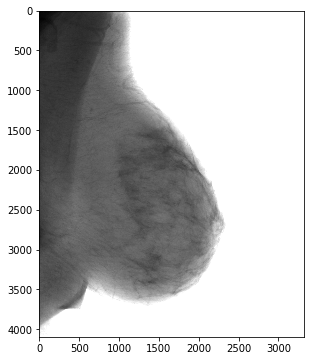

In [10]:
plotImageData('76093408_R_MLO_1',figsize=(6,6))

In [3]:
help(plotImageData)

Help on function plotImageData in module birad:

plotImageData(filename, figsize=(10, 10))
    Retrieves and plots the image data for the given file



In [ ]:
imread(fileLocation.loc[fileLocation.filename==filename].values[0][0])

In [7]:
trainData = df[df.train == False]
validData = df[df.train == True]

In [ ]:
class Dataset(torch.utils.data.Dataset):
  def __init__(self, dataFolder, dataList):
    
    
    self.data = dataList


    
  def __len__(self):
    
    return len(self.data)
    
  def __getitem__(self, index):
    
    filename = self.data.iloc[index].filename
    
    if 'FullRes' in filename :
        #Removes the starting "FullRes" from the filename
        filename = filename[7:]
    
    data = imread(os.path.join(dataFolder, filename))
    
    
    data = Image.fromarray(data)
    data = data.resize((512,512))
    
    data = np.array(data)
    
    
    
    
    
    data = data/256.0 
    
    data = torchvision.transforms.ToTensor()(data)
    
    data = data.float()
    
    label = self.data.iloc[index].label
    bmi = self.data.iloc[index].BMI
    
   
    return data,label, bmi




def my_collate(batch):

    
    img = torch.stack([item[0] for item in batch])
    label = torch.stack([ LongTensor(item[1]) for item in batch])
    bmi = torch.stack([ Tensor(item[2]) for item in batch])
    
    return [img, label, bmi]


